In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
from tb import *

In [2]:
tb = TB(config_file='config_gbv.ini',device_name='CO2')

["cdm4160","cjmcu811","fatal","heartbeat","loadavg1","loadavg15","loadavg5","mh-z14a","notice","s8lp","sen0219","sen0219avg","sen0219cma","sen0220","t3022","uptime","uptime-linux"]


In [3]:
sensores = ["mh-z14a","s8lp","sen0219","sen0220","t3022"]

# sensores = ["cdm4160","cjmcu811","sen0219","t3022","mh-z14a","sen0220","s8lp"]
datos = pd.concat([tb.get_df(key=sensor) for sensor in sensores],axis=1)
# print(datos.head())
datos.index = datos.index + pd.Timedelta("-5H")
datos.head()

,mh-z14a,s8lp,sen0219,sen0220,t3022
ts,,,,,
2021-06-21 12:01:15.851,NaN,NaN,418.0,NaN,476.0
2021-06-21 12:02:18.325,NaN,NaN,712.0,NaN,474.0
2021-06-21 12:03:20.867,NaN,NaN,418.0,NaN,471.0
2021-06-21 12:04:23.419,NaN,NaN,590.0,NaN,471.0
2021-06-21 12:05:06.847,NaN,NaN,418.0,NaN,474.0


In [6]:
#corta los datos de la fecha inicial al final
datos = datos["2021-07-01":"2021-07-05"]
datos


,mh-z14a,s8lp,sen0219,sen0220,t3022
ts,,,,,
2021-07-01 00:00:10.885,510.0,412.0,812.0,NaN,437.0
2021-07-01 00:00:26.451,509.0,412.0,653.0,NaN,436.0
2021-07-01 00:00:41.997,509.0,413.0,1025.0,NaN,435.0
2021-07-01 00:00:57.557,509.0,413.0,925.0,NaN,436.0
2021-07-01 00:01:13.133,509.0,414.0,703.0,NaN,436.0
...,...,...,...,...,...
2021-07-01 23:59:41.172,1014.0,830.0,1206.0,NaN,889.0
2021-07-01 23:59:44.108,NaN,NaN,NaN,814.0,NaN
2021-07-01 23:59:50.678,NaN,NaN,NaN,813.0,NaN


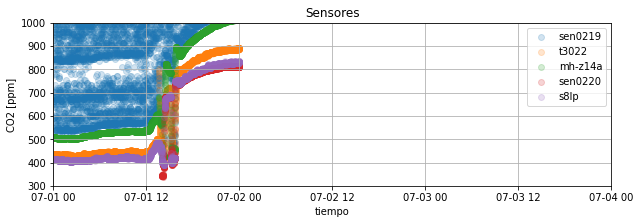

In [9]:
sensores = ["sen0219","t3022","mh-z14a","sen0220","s8lp"]

fig, ax = plt.subplots(figsize=(10,3))

fecha1 = parse("2021-07-01") 
fecha2 = fecha1 + pd.Timedelta("3D")
ax.set_xlim(fecha1,fecha2)

ax.set_ylim(300,1000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()

for sensor in sensores:
    ax.scatter(datos[sensor].index,datos[sensor],label=sensor,alpha=0.2)

ax.legend()



In [ ]:
#ajustar fecha si es necesario
datos.to_csv("../data/sensores_01-07-2021_05-07-2021.csv")